In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040179.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  0.673509  0.694037  0.713587  0.730205  0.745846  0.758553  0.768328   

          7         8         9  ...      4192      4193      4194      4195  \
0  0.777126  0.782014  0.784946  ...  0.322581  0.349951  0.378299  0.408602   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.438905  0.468231  0.497556  0.525904    115.429804      65.168264  

[1 rows x 4202 columns]
[115.42980431]  /  [65.16826377]
          0         1         2         3         4         5         6  \
0  0.673509  0.694037  0.713587  0.730205  0.745846  0.758553  0.768328   

          7         8         9  ...     4190      4191      4192      4193  \
0  0.777126  0.782014  0.784946  ...  0.27566  0.297165  0.322581  0.349951   

       4194      4195      4196      4197      4198      4199  
0  0.378299  0.408602  0.438905  0.468231  0.497556  0.525904  

[1 rows x 4200 columns]


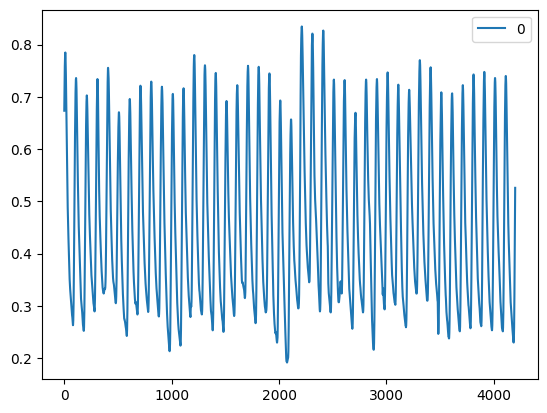

In [196]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [197]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

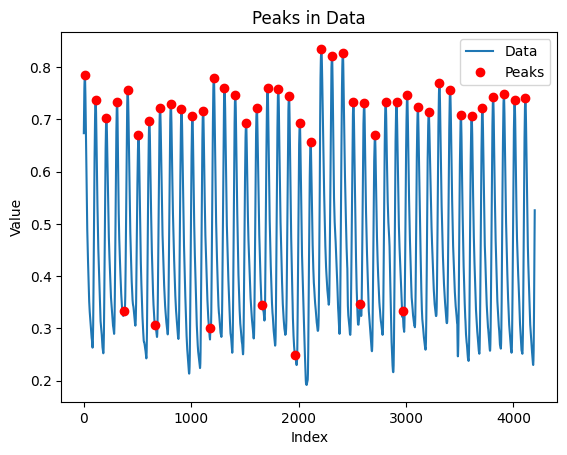

{'indices': array([   9,  109,  210,  309,  377,  408,  509,  610,  666,  709,  810,
        909, 1011, 1111, 1179, 1210, 1310, 1411, 1511, 1611, 1660, 1711,
       1811, 1910, 1970, 2011, 2112, 2212, 2310, 2411, 2510, 2573, 2610,
       2712, 2810, 2912, 2969, 3011, 3110, 3212, 3311, 3411, 3511, 3611,
       3711, 3811, 3911, 4011, 4111]), 'values': array([0.78494624, 0.73607038, 0.7028348 , 0.73411535, 0.33333333,
       0.75562072, 0.67057674, 0.69599218, 0.30694037, 0.72140762,
       0.72922776, 0.71945259, 0.70576735, 0.71652004, 0.30107527,
       0.78005865, 0.76050831, 0.74584555, 0.69208211, 0.72238514,
       0.34506354, 0.75953079, 0.75757576, 0.74486804, 0.24926686,
       0.69305963, 0.6568915 , 0.83479961, 0.82111437, 0.82697947,
       0.73313783, 0.34701857, 0.73216031, 0.66959922, 0.73313783,
       0.73411535, 0.33333333, 0.74682307, 0.72336266, 0.71358749,
       0.77028348, 0.75659824, 0.7086999 , 0.70674487, 0.72238514,
       0.742913  , 0.74780059, 0.73607038, 0

In [198]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [199]:
def split_values_high_low(filtered_df, threshold=0.6):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[0.7849462365591398, 0.7360703812316716, 0.7028347996089932, 0.7341153470185728, None, 0.7556207233626588, 0.6705767350928641, 0.6959921798631477, None, 0.7214076246334311, 0.729227761485826, 0.7194525904203324, 0.7057673509286413, 0.7165200391006843, None, 0.7800586510263929, 0.7605083088954057, 0.7458455522971652, 0.6920821114369502, 0.7223851417399805, None, 0.7595307917888563, 0.7575757575757576, 0.7448680351906158, None, 0.6930596285434996, 0.656891495601173, 0.8347996089931574, 0.8211143695014663, 0.8269794721407625, 0.7331378299120235, None, 0.7321603128054741, 0.6695992179863147, 0.7331378299120235, 0.7341153470185728, None, 0.7468230694037146, 0.7233626588465298, 0.7135874877810362, 0.7702834799608993, 0.7565982404692082, 0.7086999022482894, 0.7067448680351907, 0.7223851417399805, 0.7429130009775171, 0.7478005865102639, 0.7360703812316716, 0.739980449657869]
[None, None, None, None, 0.3333333333333333, None, None, None, 0.3069403714565005, None, None, None, None, None, 0.30107

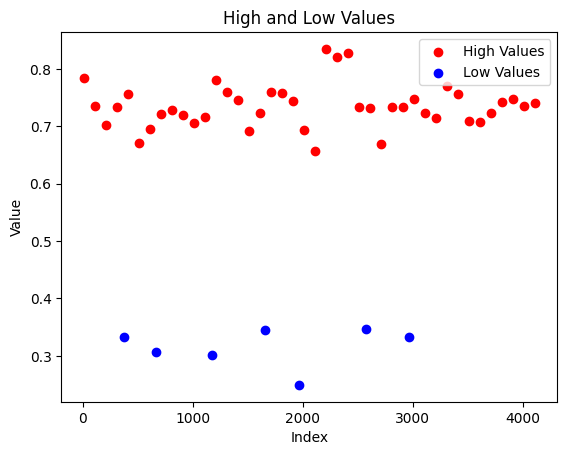

In [200]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [201]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.7353721547269935
Average Low Value: 0.3165758972210585
